In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mnist = keras.datasets.fashion_mnist

C:\Users\GL62VR\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(x_train, label_train), (x_test, label_test) = mnist.load_data()

1, Autoencoder

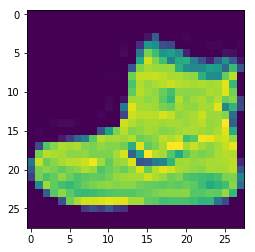

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0, :, :].reshape(28,28))
plt.show()

In [4]:
auto_encoder = keras.Sequential()
# encoder
auto_encoder.add(keras.layers.Conv2D(filter=32, kernel_size=(3,3), activation='relu',  padding='same',strides=(1,1), input_shape=(28,28,1)))
auto_encoder.add(keras.layers.MaxPool2D((2,2), padding='same'))
auto_encoder.add(keras.layers.Conv2D(filter=32, kernel_size=(3,3), activation='relu',  padding='same',strides=(1,1)))
auto_encoder.add(keras.layers.MaxPool2D((2,2), padding='same'))
auto_encoder.add(keras.layers.Conv2D(filter=32, kernel_size=(3,3), activation='relu',  padding='same',strides=(1,1)))
auto_encoder.add(keras.layers.MaxPool2D((2,2), padding='same'))

#decoder
auto_encoder.add(keras.layers.Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
auto_encoder.add(keras.layers.UpSampling2D((2,2)))
auto_encoder.add(keras.layers.Conv2D(filters=8, kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
auto_encoder.add(keras.layers.UpSampling2D((2,2)))
auto_encoder.add(keras.layers.Conv2D(filters=8, kernel_size= (3,3), activation= 'relu',strides=(1,1)))
auto_encoder.add(keras.layers.UpSampling2D((2,2)))
auto_encoder.add(keras.layers.Conv2D(filters=1, kernel_size= (3,3), activation= 'sigmoid', padding='same'))
auto_encoder.compile(optimizer='Adam', loss='binary_crossentropy')
auto_encoder.fit(x_train, x_train, epochs=3, batch_size=256, validation_split=0.3)

NameError: name 'Seq' is not defined